In [1]:
from setuptools.command.rotate import rotate
#using https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/ARC_3_0_introduction.html#Preliminaries:-general-note-on-using-ARC-with-Alkaline-Earths
# first we install most recent upgrade of arc
!pip install ARC-Alkali-Rydberg-Calculator --upgrade --no-cache-dir

In [4]:
from arc import *

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
import pickle

In [6]:
atom = Calcium40()
print("QD")
atom.getQuantumDefect(6,3,3,0)



QD


0.09128082390826674

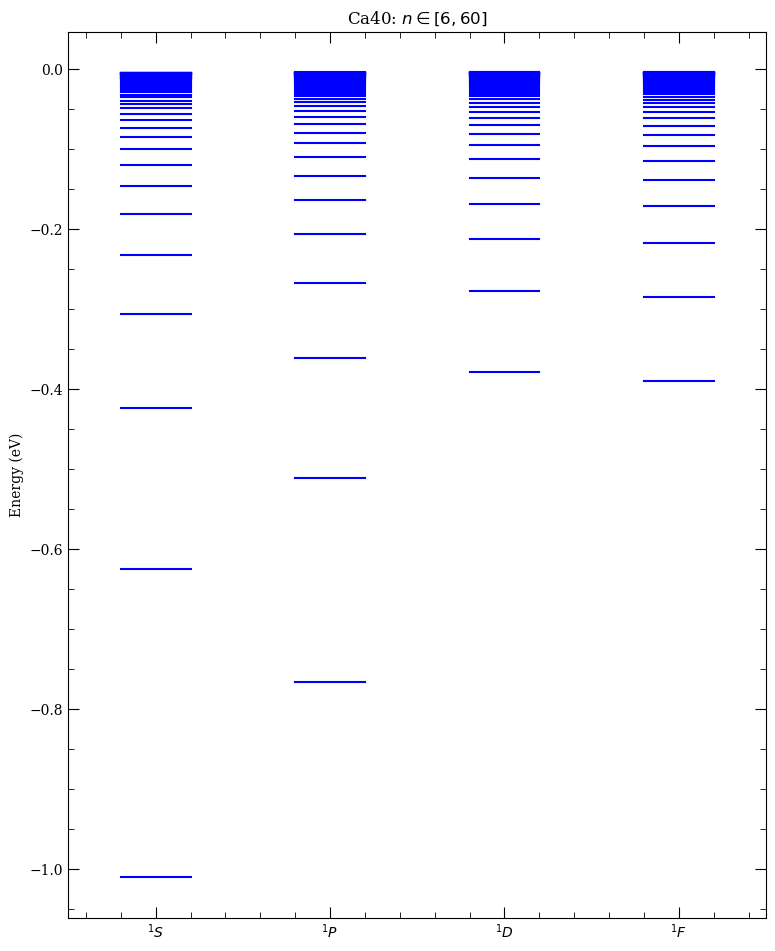

In [7]:
atom = Calcium40()
atom.getEnergy(56, 2, 2, s=0)
# Load parameters for Calcium

nmin = 6  # Minimum n
nmax = 60  # Maximum n
lmin = 0  # Minimum l
lmax = 3  # Maxmium l

# Plot Energy Levels of Cesium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax, sList=[0])
levels.drawLevels()
levels.showPlot()

In [15]:
print(atom.getEnergy(35, 3, 3, s=0))

# Load parameters for Calcium
%matplotlib qt

nmin = 34  # Minimum n
nmax = 35 # Maximum n
lmin = 0  # Minimum l
lmax = 8  # Maxmium l

# Plot Energy Levels of Cesium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax, sList=[0,1])
levels.drawLevels()
levels.showPlot()

-0.011168742061229768


In [16]:
## Stark Map

calc = StarkMap(Calcium40())
%matplotlib qt
# Target state
n0 = 35
l0 = 3
j0 = 3
mj0 = 0
s0 = 0
# Define max/min n values in basis
nmin = n0 - 10
nmax = n0 + 10
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 34

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=s0)

Emin = 0.0  # Min E field (V/m)
Emax = 20.0e2  # Max E field (V/m)
N = 1001  # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True, units="eV", highlightState=True)
calc.ax.set_ylim(-0.0140,-0.0110 )
calc.showPlot(interactive=True)
# Return Polarizability of target state
#print(
#    "%.5f MHz cm^2 / V^2 "
#    % calc.getPolarizability(showPlot=True, minStateContribution=0.9)
#)



Found  645  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


0

In [13]:
a=calc.highlight[N-1]
print('a=',a)
MixingStates_Coef = []#list

MixingStates_Term = []#list
for i in range(len(a)):
    if calc.basisStates[i] == [35, 3, 3, 0] :
        print('Il est ici!!!!',i)
    else :
        pass
for i in range(len(a)):
    if a[i] > 10**-3 :
        print('i=',i)
        #print("{}\t{}".format(calc.basisStates[i],a[i]))
        print(len(a))
        print(len(calc.basisStates))
        print(calc.basisStates)

        MixingStates_Coef.append(a[i])
        MixingStates_Term.append(calc.basisStates[i])
        #print(calc.basisStates[i],'i')
        #print(calc.basisStates[i-1],'i-1')
        #print(calc.basisStates[i + 1], 'i+1')
    else :
        pass
print('coef=',MixingStates_Coef)
# still need to check that highlight and basisStates are arranged the same way.

# histogramm of the mixingstates

n_bins = len(MixingStates_Coef)
MixingStates_Coef = np.array(MixingStates_Coef)
MixingStates_Term = np.array(MixingStates_Term)
#for i in range(len(MixingStates_Coef)):
#    MixingStates_Coef[i] = '%.2E' % Decimal(MixingStates_Coef[i])
# make data:
## separation of information for the term matrix
#x = []
#for i in range(len(MixingStates_Term)):
#    x.append(i+0.5)
# transform list of quantum numbers into terms
# in general terms are written such so ^2S+1L_J
def Term(n,l,j,s):
    first_quantum_number = n
    Spin_part = 2*s+1

    if l==0 :
        orbital = "S"
    elif l==1:
        orbital = "P"
    elif l==2:
        orbital = "D"
    elif l==3:
        orbital ="F"
    elif l==4:
        orbital = "G"
    elif l==5:
        orbital = "H"
    elif l==6:
        orbital = "I"
    elif l==7:
        orbital = "K"
    else :
        orbital = int(l)

    term = "{N}$^{S}{L}_{J}$"
    return term.format(N=int(first_quantum_number),J = int(j),L = orbital,S=int(Spin_part))
# now we rewrite the list of list as a list of terms
MixingStates_Term_new = []
#(MixingStates_Term)
for i in range(len(MixingStates_Term)):

    MixingStates_Term_new.append(Term(MixingStates_Term[i][0],MixingStates_Term[i][1],MixingStates_Term[i][2],MixingStates_Term[i][3]))

x = MixingStates_Term_new

y = MixingStates_Coef

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.5)
multiplier = 0
for coef in MixingStates_Coef:
    offset = multiplier
    rects = ax.bar(offset,coef ,width=1)
    ax.bar_label(rects,labels=[f"{coef:.3f}" for coef in rects.datavalues], padding=5, fontsize=8, rotation='vertical')
    multiplier+=1
#length of axes should be adjusted to the number of relevant states in the mixing state
ax.set(xlim=(-0.5, len(MixingStates_Coef)-0.5),
       ylim=(0, 1))
ax.set_ylabel('coefficient du mix')
ax.set_title(r'Mixing states of Stark Levels in $^{40}Ca$')
ax.tick_params(axis='x',pad=0)
plt.xticks(rotation = 90)
plt.show()

a= [9.006747248678859e-18, 1.0134188146086403e-14, 5.189399445945678e-16, 4.281925077917377e-13, 1.6280163730189028e-14, 3.7901622336648433e-10, 4.7616628425740436e-12, 6.695251063548037e-12, 8.08742586735264e-12, 8.877218842574894e-12, 8.870048335777366e-12, 7.787140268446903e-12, 5.329508267523471e-12, 1.6489499313619244e-12, 9.334931570073203e-13, 4.770184259626067e-11, 5.623338515614023e-10, 9.193041862733813e-10, 3.914254742407422e-10, 2.227027022954257e-10, 1.6434848435220964e-10, 1.3647393288183535e-10, 1.1983026957673727e-10, 1.078955730100654e-10, 9.773876967481262e-11, 8.757562361440707e-11, 7.572890263353459e-11, 5.923789401912389e-11, 1.8430553571806538e-10, 3.4762831052358027e-14, 1.13029473431546e-09, 4.325801528384852e-12, 6.9744948282417665e-12, 9.17894119142488e-12, 1.0634818604695868e-11, 1.093846643665385e-11, 9.630907952157645e-12, 6.350880625039204e-12, 1.6530208555971843e-12, 1.5685010291138978e-12, 4.8561657033520265e-11, 4.5175121773424174e-10, 1.532282875890978

In [89]:
"""
NE FONCTIONNE PAS ENCORE

from PIL import Image

image = Image.open("stark.jpeg")
with open("image.pickle", "wb") as file:
    pickle.dump(image, file) 
"""


In [90]:
"""
figx = pickle.load(open('image.pickle', 'rb'))
figx.show() # Show the figure, edit it, etc.!
"""

Text(0.5, 1.0, 'Ca Quantum Defects')

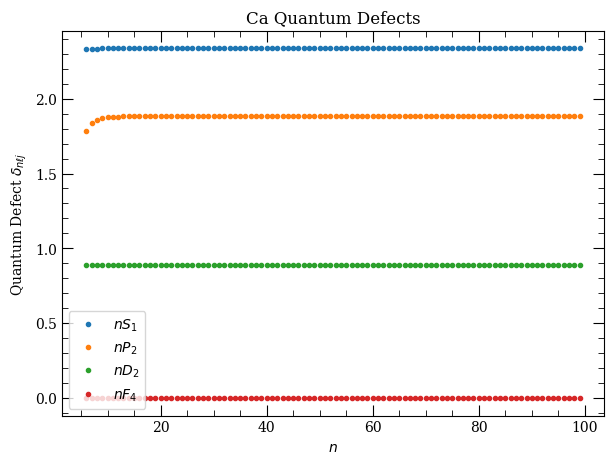

In [66]:
 
n = np.arange(6, 100, 1)

## a noter que ici c'est sans le calcium modifie, donc peu d'info.

# Plot Quantum Defects of Cs
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

axes.plot(n, atom.getQuantumDefect(n, 0, 0), ".", label="$nS_{1}$")
axes.plot(n, atom.getQuantumDefect(n, 1, 1), ".", label="$nP_{2}$")
axes.plot(n, atom.getQuantumDefect(n, 2, 0), ".", label="$nD_{2}$")
axes.plot(n, atom.getQuantumDefect(n, 3, 1), ".", label="$nF_{4}$")
axes.legend(loc=0)
axes.set_xlabel("$n$")
axes.set_ylabel(r"Quantum Defect $\delta_{n\ell j}$")
axes.set_title("Ca Quantum Defects")

 Grace au papier de Gallagher, on peut essayer de trouver des quantum defect pour des l plus grands que ce que l'on a jusqu'à présent. Dans ce papier, il est presente une determination de l'energie par une perturbation. On a alors E = E_h - W, ou E_h est l'energie de l'atome d'hydrogene. La formule de l'energie d'atomes de Rydberg n'est pas utilise MAIS on peut simplement faire une equivalence entre ces deux formules pour determiner les QD pour les niveaux qui nous interesses. 
 


$$ E = - \frac{1}{2n^2} - W_{pol,nl} = - \frac{1}{2(n-\delta_{nl})^2}  $$ 
$$ W_{pol,nl}=-\frac{1}{2}k_d\alpha_d \langle r^{-4} \rangle _{nl} - \frac{1}{2}k_q \alpha_q \langle r^{-6} \rangle _{nl}$$

On va utiliser les valeurs présentes pour le plus haut n que l'on ait a disposition en se disant que pour les niveaux qui nous interesses, sa valeur n'en sera pas trop eloignee (les valeurs ne changent pas enormement). Pour montrer que cela n'affecte pas trop, on pourrait faire un graphique des valeurs de k_d,... pour chaque n et faire une regression lineaire par exemple.

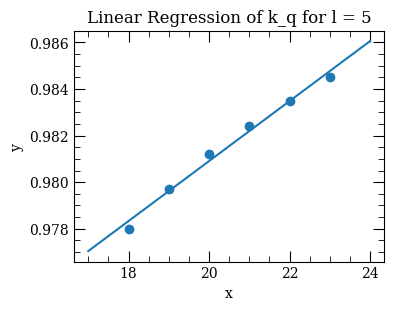

In [14]:
from sklearn.linear_model import LinearRegression
y = np.array([0.9780, 0.9797, 0.9812, 0.9824, 0.9835, 0.9845])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_q for l = 5")
plt.show()

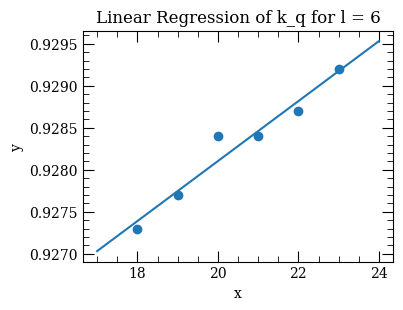

In [15]:
y = np.array([0.9273, 0.9277, 0.9284, 0.9284, 0.9287, 0.9292])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_q for l = 6")
plt.show()

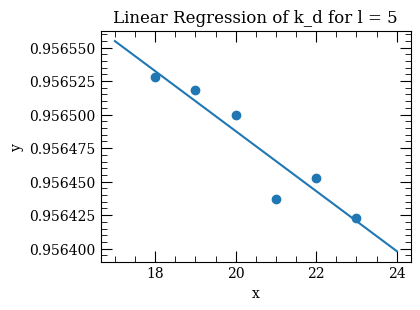

In [16]:
y = np.array([0.956528, 0.956518, 0.956500, 0.956437, 0.956453, 0.956423])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 5")
plt.show()

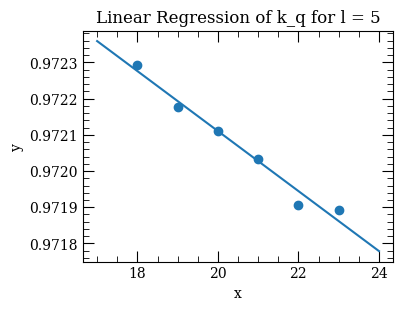

In [17]:
y = np.array([0.972293, 0.972178, 0.972111, 0.972033, 0.971906, 0.971892])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20, 21, 22, 23])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 6")
plt.show()

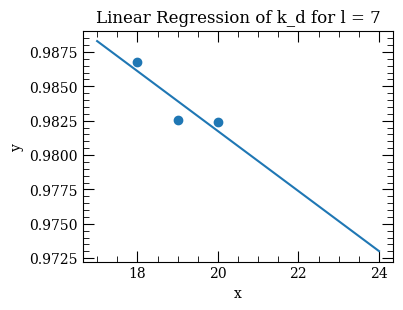

In [19]:
y = np.array([0.98680, 0.982543, 0.982437])
y = y.reshape(-1, 1)  # transforme en tableau (n, 1)

x = np.array([18, 19, 20])
x = x.reshape(-1, 1)  # transforme en tableau (n, 1)


model = LinearRegression()
model.fit(x, y)

x_new = np.linspace(17, 24)
y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.title("Linear Regression of k_d for l = 7")
plt.show()

In [51]:
## on a un range pour les valeurs de a_d et a_q, donc faudra faire des tests pour voir ce qui semble ok ou pas. Voir faire plusieurs fois les calculs et voir tout ce qui pourrait se passer, a quel point un calcul est affecte par tel ou telle valeur choisi des coeff. (difference d'ordre de grandeur ?)

a_0 = 5.291772109*10**-11

k_d = np.array([0.956423,0.971892,0.982437]) # for respectively l=5,6,7
k_q = np.array([0.9845, 0.9292, 0.9376]) # for respectively l=5,6,7

# the values of alpha_d and alpha_q are bounded. 
alpha_d_low = 75.3*a_0**3
alpha_d_high = 76.9*a_0**3
alpha_q_low = 206*a_0**5
alpha_q_high = 1590*a_0**5


In [40]:
"""
From Chap 2 of Gallagher we can define the expectation values of powers of e-/nucleus distances
"""
def r4_expectation(n, ell):
    """
    Calcule la valeur de <1/r^4> en fonction de n et ell.
    """
    numerator = 3 * n**2 - ell * (ell + 1)
    denominator = (2 * n**5 * (ell + 3/2) * (ell + 1) * (ell + 1/2) * ell * (ell - 1/2))
    return numerator / denominator

def r6_expectation(n, ell):
    """
    Calcule la valeur de <1/r^6> en fonction de n et ell.
    """
    numerator = (35 * n**4 
                 - 5 * n**2 * (6 * ell * (ell + 1) - 5) 
                 + 3 * (ell + 2) * (ell + 1) * ell * (ell - 1))
    denominator = (8 * n**7 * (ell + 5/2) * (ell + 2) * (ell + 3/2) * 
                   (ell + 1) * (ell + 1/2) * ell * (ell - 1/2) * (ell - 1) * (ell - 3/2))
    return numerator / denominator

"""
noting that in gallagher, it's refered to two references where alpha_q is around 870. 
"""
def W_polarization_energy_shift (n, l ,alpha_d, alpha_q, k_d, k_q):
    """
    
    :param n: principal quantum number
    :param l: secondary quantum number
    :param alpha_d: alpha dipole
    :param alpha_q: alpha quandrupole   
    :param k_d: k dipole
    :param k_q: k quandrupole
    :param r**-4 : expectation values of power of distance electron-nucleus
    :return: value of the energy shift (real_E=E_hydrogen-W)
    """
    x = -1/2*k_d*alpha_d*()-1/2*k_q*alpha_q*()
    print("polarization energy shift of",n,l,"=",x)
    return x
def print_n_l(n, l):
    return f"n={n}, l={l}"  # Return a formatted string instead of printing



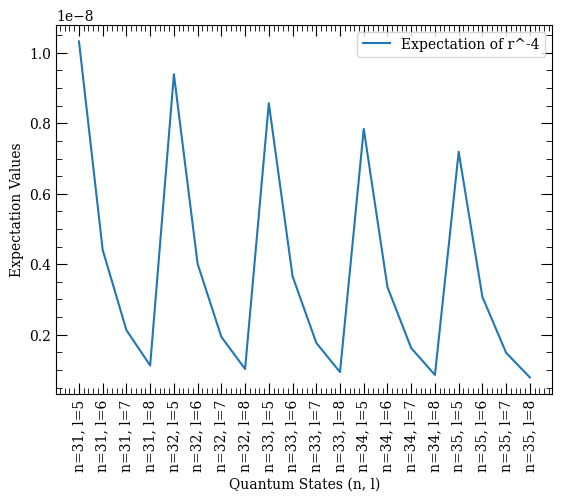

In [49]:
x4 = []
y4 = []

nombre_quantique_principal_test = 35
for i in range(30,nombre_quantique_principal_test):

    for j in range(4,8):
        
        if j > 3 : 
            x4.append(print_n_l(i+1,j+1))
            y4.append(r4_expectation(i+1,j+1))
            
        else :
            pass
fig, ax = plt.subplots()
ax.plot(x4, y4, label="Expectation of r^-4")

ax.set_xlabel("Quantum States (n, l)")
ax.set_ylabel("Expectation Values")
ax.legend()
plt.xticks(rotation=90,fontsize=10)  # Rotate x-axis labels for readability if needed
plt.show()
        

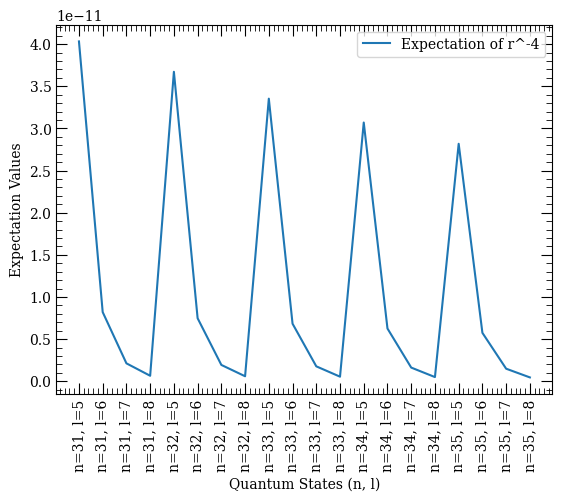

In [48]:
x6 = []
y6 = []

nombre_quantique_principal_test = 35
for i in range(30,nombre_quantique_principal_test):

    for j in range(4,8):
        
        if j > 3 : 
            x6.append(print_n_l(i+1,j+1))
            y6.append(r6_expectation(i+1,j+1))
            
        else :
            pass
fig, ax = plt.subplots()
ax.plot(x6, y6, label="Expectation of r^-4")

ax.set_xlabel("Quantum States (n, l)")
ax.set_ylabel("Expectation Values")
ax.legend()
plt.xticks(rotation=90,fontsize=10)  # Rotate x-axis labels for readability if needed
plt.show()
        

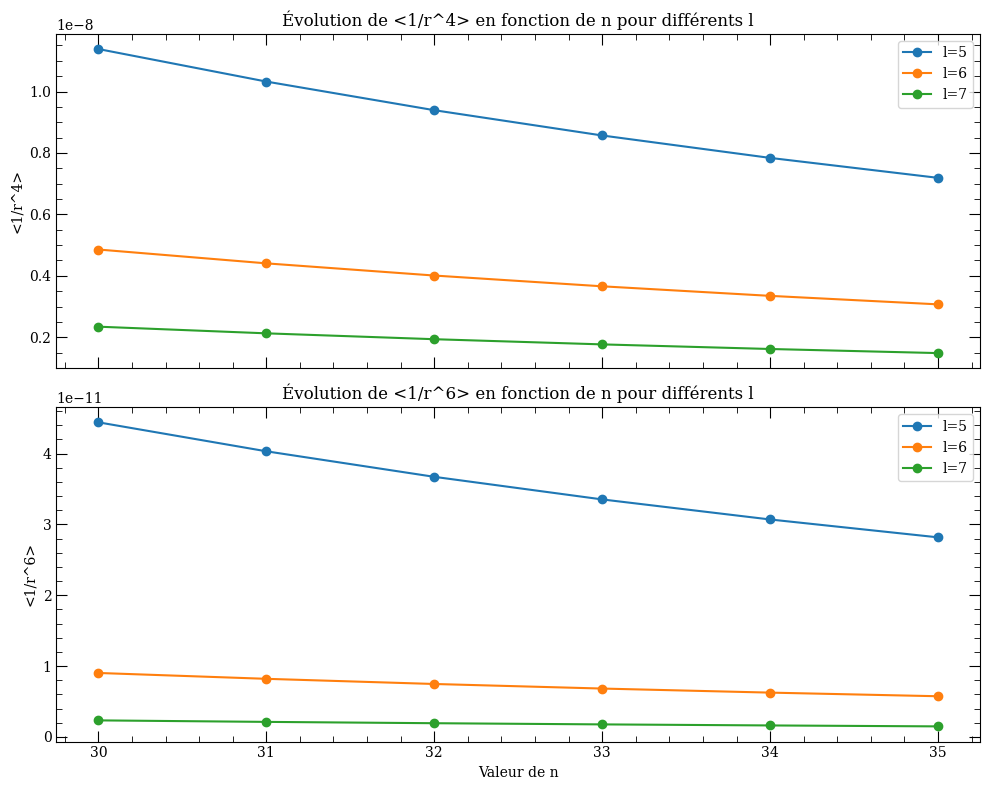

In [50]:
import matplotlib.pyplot as plt

# Initialisation des listes pour stocker les valeurs de n, r4 et r6
n_values = range(30, 36)  # n entre 30 et 35
l_values = range(5, 8)    # l entre 5 et 7

# Initialisation des dictionnaires pour stocker les valeurs de <1/r^4> et <1/r^6> pour chaque l
r4_values = {l: [] for l in l_values}
r6_values = {l: [] for l in l_values}

# Calcul des valeurs pour chaque combinaison de n et l
for n in n_values:
    for l in l_values:
        r4 = r4_expectation(n, l)
        r6 = r6_expectation(n, l)
        r4_values[l].append(r4)
        r6_values[l].append(r6)

# Création du graphique
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Tracé de <1/r^4> pour chaque valeur de l
for l in l_values:
    ax[0].plot(n_values, r4_values[l], 'o-', label=f'l={l}')
ax[0].set_ylabel("<1/r^4>")
ax[0].set_title("Évolution de <1/r^4> en fonction de n pour différents l")
ax[0].legend()

# Tracé de <1/r^6> pour chaque valeur de l
for l in l_values:
    ax[1].plot(n_values, r6_values[l], 'o-', label=f'l={l}')
ax[1].set_xlabel("Valeur de n")
ax[1].set_ylabel("<1/r^6>")
ax[1].set_title("Évolution de <1/r^6> en fonction de n pour différents l")
ax[1].legend()

plt.tight_layout()
plt.show()


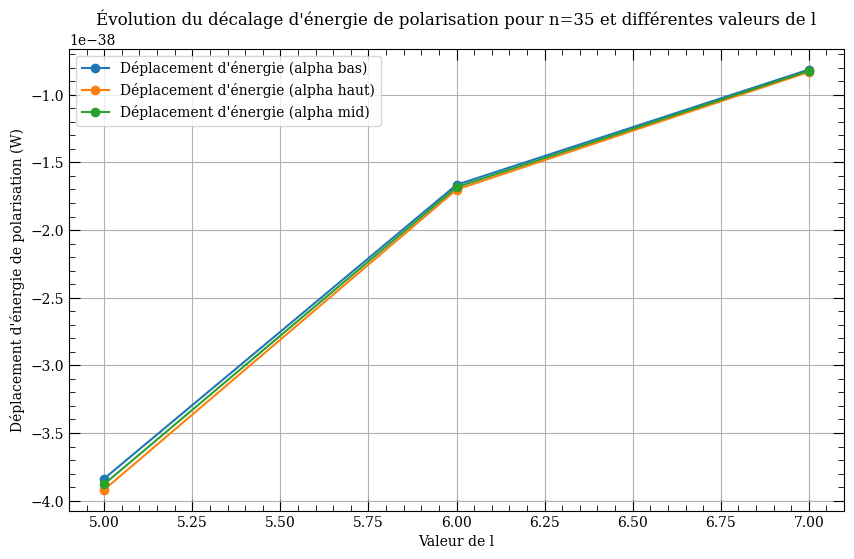

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Constante a_0
a_0 = 5.291772109 * 10**-11

# Valeurs spécifiques de k_d et k_q pour l = 5, 6, 7
k_d_values = np.array([0.956423, 0.971892, 0.982437])
k_q_values = np.array([0.9845, 0.9292, 0.9376])

# Limites pour alpha_d et alpha_q
alpha_d_low = 75.3 * a_0**3
alpha_d_high = 76.9 * a_0**3
alpha_q_low = 206 * a_0**5
alpha_q_high = 1590 * a_0**5
alpha_d_mid = (alpha_d_low + alpha_d_high) / 2
alpha_q_mid = 870 * a_0**5

# Fonction pour le calcul du décalage d'énergie de polarisation
def W_polarization_energy_shift(n, l, alpha_d, alpha_q, k_d, k_q):
    """
    Calcule le décalage d'énergie de polarisation.
    
    :param n: principal quantum number
    :param l: secondary quantum number
    :param alpha_d: alpha dipole
    :param alpha_q: alpha quadrupole
    :param k_d: k dipole
    :param k_q: k quadrupole
    :return: valeur du décalage d'énergie
    """
    # Calcul des valeurs de <1/r^4> et <1/r^6>
    r4 = r4_expectation(n, l)
    r6 = r6_expectation(n, l)
    
    # Calcul du décalage d'énergie
    x = -0.5 * k_d * alpha_d * r4 - 0.5 * k_q * alpha_q * r6
    return x

# Initialisation des listes pour stocker les résultats
l_values = [5, 6, 7]
n = 35
energy_shifts_low = []
energy_shifts_high = []
energy_shifts_mid = []

# Calcul des décalages d'énergie pour chaque l avec les valeurs limites de alpha_d et alpha_q
for i, l in enumerate(l_values):
    # Pour alpha_d et alpha_q bas
    shift_low = W_polarization_energy_shift(n, l, alpha_d_low, alpha_q_low, k_d_values[i], k_q_values[i])
    energy_shifts_low.append(shift_low)
    
    # Pour alpha_d et alpha_q haut
    shift_high = W_polarization_energy_shift(n, l, alpha_d_high, alpha_q_high, k_d_values[i], k_q_values[i])
    energy_shifts_high.append(shift_high)
    
    # Pour alpha_d et alpha_q mid
    shift_mid = W_polarization_energy_shift(n, l, alpha_d_mid, alpha_q_mid, k_d_values[i], k_q_values[i])
    energy_shifts_mid.append(shift_mid)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(l_values, energy_shifts_low, 'o-', label="Déplacement d'énergie (alpha bas)")
plt.plot(l_values, energy_shifts_high, 'o-', label="Déplacement d'énergie (alpha haut)")
plt.plot(l_values, energy_shifts_mid, 'o-', label="Déplacement d'énergie (alpha mid)")
plt.xlabel("Valeur de l")
plt.ylabel("Déplacement d'énergie de polarisation (W)")
plt.title("Évolution du décalage d'énergie de polarisation pour n=35 et différentes valeurs de l")
plt.legend()
plt.grid(True)
plt.show()


On remarque que les valeurs ne changent pas significativement en fonction des valeurs prises.
Nous allons maitenant comparer avec les valeurs d'énergies du NIST pour pouvoir trouver les valeurs de QD pour l = 5,6,7.